<h1>自然語言處理與語意分析
    <h3>主題：利用爬蟲程式抓取PTT網友留言資料以判斷某即將上市車款風評。
        <h4>說明：眾所皆知，YAMAHA不僅僅鑽研於音樂市場，在兩輪市場中也是世界霸主之一，甚至製作出許多經典車款。例如搭載4缸十字區軸的公升級仿賽跑車R1、賽道王者R6，以及擁有扭力大師(Master Of Torque)稱號的MT系列，一直以來都是近年來最受廣泛討論與喜愛的車款。近期，經典車款R7即將重新上市，此一消息釋出也馬上造成車界熱烈討論，台灣也不例外。因此基於好奇，所以決定利用爬蟲抓取ptt上車友，對於這台即將販售的R7有怎樣的評論。</h4>
 
   

<h2>Step1資料擷取與整理

In [1]:
## Step1 資料抓取與整理
import pandas as pd
import numpy as np
import jieba
import requests
from jieba import analyse
from bs4 import BeautifulSoup
url='https://www.ptt.cc/bbs/SuperBike/M.1621344866.A.3E0.html'
cookies={'over18':'1'} ## ptt擁有18以上才可進入的阻擋機制，所以必須在over18這裡設為1，以代表你已18且同意一些相關規定。
html=requests.get(url,cookies=cookies)
html.encodingding='UTF-8'
sp=BeautifulSoup(html.text,'lxml')
total_com=''
text_all=[]
for i in range(0,len(sp.find_all('div',class_='push'))):
    data=sp.find_all('span',class_='f3 push-content')
    total_com=total_com+data[i].text 
    #rep=[':','!','.','?',' ','XD','Q','ㄎ','。','@',',','，','？','！']
    rep=['XD','Q','ㄎ','@','.']
    for r in rep:
        total_com=total_com.replace(r,'')
    total_com=total_com.replace(':','。')
    text_all.append(data[i].text)
    text_df=pd.DataFrame({'comment':text_all})
    #print(data[i].text)                           
    #print('/'.join(jieba.cut(data[i].text)))       ##因為將其結果上傳至GitHub，會造成過度佔版面問題，所以在此改以DataFrame形式，輸出擷取結果。
text_df

,comment
0,: 香
1,: 07: 零件車get!
2,: MT-07 $7699->36萬 R7 $8999->先猜42.8萬
3,: 07 XSR700 R7 三兄弟
4,: 連rs660都不如
...,...
177,: 以前R7 真的是神主牌...沒想到也淪落到變雙缸車
178,: 樓上說到的就是最大的問題 比方取名r07好了 只要不
179,: 吃22年前4缸20汽門的yzf-r7豆腐 我才懶得譙它譙山葉
180,: 爛引擎+爛車架，根本敗壞R7威名


In [2]:
##為了方便觀察與後續的分析，所以將所有留言全部合併在一起。
total_com 

'。 香。 07。 零件車get!。 MT-07 $7699->36萬  R7 $8999->先猜428萬。 07 XSR700 R7 三兄弟。  連rs660都不如。   超爛的一台鳥車 低成本開發  註定是台過客車。   這東西掛R7???。   說真的好歹把09的新引擎跟車架拿過來用調成R7。    至少還有IMU。 都爛成這樣了，還連TCS都沒有。 yamaha獨創的扭力大失仿賽產品線。 https。//reurlcc/6yWzl5。 有詳細的細節可以觀看 看起來按鍵蠻少的。 選配快排$200好像只有進檔。 就是戰鬥點的07，比起說R7為什麼這樣，其實應該問。 為什麼07一直停在那。。 可能是以入門為主，所以配備給得很陽春，但現在。 要雙缸600級距，沒品牌迷思的話加一點直接上RS660吧。 該有的都有。 反倒是會被人嫌棄的點，畢竟trident 660。 沒看到馬力。 問題是其他人入門級的也有向前走，就07停在原地。。 真的。 有夠不香。 R系列應該會更好的感覺啊。 以妥善率、外型，價格壓在35內應該賣得不錯，中量。 級最帥最好養的車可以吸引很多人吧。 完全被RS660壓在地上磨擦阿 Y牌中量級再失一城。 樓上 這台怎麼可能壓在35內 連07都要36了。 進檔快排只要斷點火 退檔要線傳油門才可以電子補油。  對07來說就改太多了。 問題是不可能35啊，如果要38以上要怎麼跟CBR650R。 07 +5w起跳賣吧。 超無感的車。 打？ 比較好的懸吊跟制動？。 懸吊制動可以改 但引擎基本上救不了 結論R7還是被。 650R屌虐。 刷電腦將近100P跟極限70多P差距太多了。 接近40客群會被吸到650那邊，希望跟07一起調降。 07 降價到35萬 R7賣35萬 解決了。 二手價這麼慘 有人衝嗎。 07降價到30萬 打錯。 好像沒寫有沒有TCS吧？倒是手把的總成跟R6蠻像的。 還好吧，非純仿賽的話，很多車黃跟紅牌入門都走街。 車&街跑共用。 R7對手不會是打CBR650R吧，應該是忍650那類的吧。 請問650R的漏油改善了嗎。 因為是CBR650R那個價格啊。 美國比CBR650R便宜$700賣個38以下才有吸引力。 07賣太貴了搞得這台很難定價。 那價錢我寧願買650r。 定價不香啊。 哭啊。 這個騎姿設定應該蠻運動的。 香。 9000鎂，來台灣肯定4字頭，

<h2>Step2字詞處理與分析</h2>

* 先進行詞性的分析，這樣才能知道後續分析時，能夠過濾或凸顯哪些詞性。

* 除此之外，也藉此觀察斷詞方式，看看有那些字詞的斷詞方式需要做後續的調整。例如自行設定字典，或設定停用字。

In [3]:
#詞性分析
pos_cut=[]
for pos in jieba.posseg.cut(total_com):
    pos_cut.append(pos)
    pos_df=pd.DataFrame({'詞性':pos_cut})
    #print(pos)  
pos_df

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.cache
Loading model cost 0.284 seconds.
Prefix dict has been built succesfully.


,詞性
0,。/x
1,/x
2,香/Vi
3,。/x
4,/x
...,...
2110,威名/N
2111,。/x
2112,/x
2113,便宜/Vi


07 = 0.557032
R7 = 0.492759
650 = 0.235667
價格 = 0.149970
40 = 0.149970
口球 = 0.149970
35 = 0.128546
R3 = 0.128546
引擎 = 0.117857
MT = 0.107122
雙缸 = 0.107122
不錯 = 0.107122
CBR650R = 0.107122
懸吊 = 0.107122
外型 = 0.091963
36 = 0.085697
09 = 0.085697
配備 = 0.085697
RS660 = 0.085697
馬力 = 0.085697


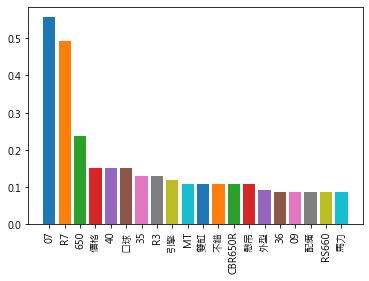

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
# 可以自己設定字典，來決定要阻擋那些沒意義的字詞，或著凸顯那些次詞的組合。
jieba.analyse.set_stop_words('C:/Users/User/Desktop/做品/ptt_bike_stop.txt')
jieba.load_userdict('C:/Users/User/Desktop/做品/ptt_bike.txt')

imp=jieba.analyse.extract_tags(total_com,topK=20,withWeight=True,allowPOS=
                              ('eng','Vi','N','n','m','a','Vt'))

for i in imp:
    plt.rcParams["font.sans-serif"]="Microsoft JhengHei"
    print('%s = %f'%(i[0],i[1]))
    plt.xticks(rotation=90)
    plt.bar(i[0],i[1])

* 除了R7一詞在這最被關注外，07(MT-07)也被提論非常多次。
* 另外650也常被提及。650在這裡算是他牌的重機，基本上就是Honda的CBR650R系列，或著kawasaki的忍650。
* 其他較重要的字詞大概就是價格、外觀、還有雙缸引擎的問題。
* ps:裡面似乎出現了一個比較令人害羞的字詞，但google查了一下R7與最新一代的MT系列車系，相信就不難懂為甚麼這邊大家一直提到這個字詞了。

07 = 26
R7 = 23
車 = 14
650 = 11
萬 = 10
台灣 = 10
引擎 = 8
缸 = 8
是 = 7
好 = 7
價格 = 7
40 = 7
口球 = 7
香 = 6
這樣 = 6
35 = 6
R3 = 6


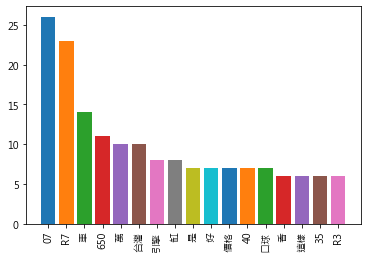

In [5]:
dic={}
for word,flag in jieba.posseg.cut(total_com):
    if(flag=='eng') | (flag=='Vi') | (flag=='N') | (flag=='n') | (flag=='m') |(flag=='a') | (flag=='Vt'):
        if word not in dic:
            dic[word]=1
        else:
            dic[word]=dic[word]+1
for w in sorted(dic,key=dic.get,reverse=True):
    if dic[w] > 5:
        print('%s = %d'%(w,dic[w]))
        plt.bar(w,dic[w])
        plt.xticks(rotation=90)

* 單純就以出現次數而言，這裡也呈現差不多一樣的結果。

<h2>Step3語意分析前處理</h2>

* 在這裡值得注意的是，PTT的留言常常會被強迫斷句，如下圖所示。
   
            

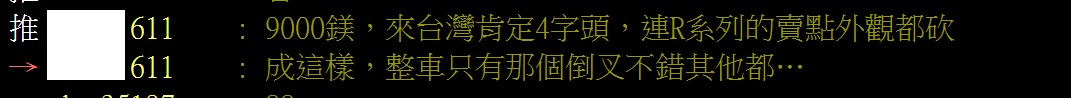

* 相信不難看出來，這是一句完整的話。但這樣的斷行會造成我們在進行爬蟲，甚至分析時，會認為這兩句是完全分開不相關的。
* 雖然這樣的機制造成分析上的困擾，不過還好ID是不會動的。所以在這裡我的做法就是將ID相同的留言，全部都合併在一起。這樣除了可以解決上述的問題外，也可以避免同一支帳號不斷的洗負評或正評，造成整體分析的不公平。

In [6]:
from snownlp import SnowNLP
id_list=[] #存放ID的list，紀錄有哪些人在這邊留言。
comment_list=[] #存放每個ID所留下的內容、評論
id=sp.find_all('span',class_='f3 hl push-userid')
comment=sp.find_all('span',class_='f3 push-content')

#一一將所有ID讀入，並存放至id_list內
for i in id:
    user_id=i.text
    id_list.append(i.text)

#同上，但這裡是存入每一則留言。    
for c in comment:
    comment_div=c.text
    #去除一些不重要的符號、文字
    rep=[':','!','.','?','XD','Q','ㄎ','@',',','，','？','！','。',' ','ㄅ','~']
    for r in rep:
        comment_div=comment_div.replace(r,'')
    comment_list.append(comment_div)
comment_list
## 接著我在這裡是利用groupby的方式，將ID相同的留言全部合併在一起。
## 在Group by之前，先將其存放至DataFrame
comment_df=pd.DataFrame({'ID':id_list,'comment':comment_list})
comment_df 



,ID,comment
0,fyjgftujj,香
1,beyondbaal,07零件車get
2,chi17,MT-07$7699->36萬R7$8999->先猜428萬
3,JudgmentLin,07XSR700R7三兄弟
4,wsx88432,連rs660都不如
...,...,...
177,anajal,以前R7真的是神主牌沒想到也淪落到變雙缸車
178,ketsukuo,樓上說到的就是最大的問題比方取名r07好了只要不
179,ketsukuo,吃22年前4缸20汽門的yzf-r7豆腐我才懶得譙它譙山葉
180,samson5441,爛引擎+爛車架根本敗壞R7威名


In [7]:
# Group by後的結果
comment_df2=comment_df.groupby('ID')['comment'].sum()
comment_df2

ID
B9907143        沒看到馬力刷電腦將近100P跟極限70多P差距太多了
DarenR                                口球口球
DarkAngelX1                          便宜代步車
ElrosHsun                    我也覺得台灣售價會40左右
EricHsu19                             有夠不香
                           ...            
wison4451                                臭
wsx88432                         連rs660都不如
yd1143                               超無感的車
york1987                 應該只是為了補中排量有罩車這塊的缺
zz7856132                        外型屌打其他650
Name: comment, Length: 116, dtype: object

<h2>Step4語意分析

In [8]:
# 於此使用SnowNLP進行語意分析

pos=0 #正面評論計數器
native=0 #負面評論計數器

for j in comment_df2:
    s=SnowNLP(j)
    for sentence in s.sentences:
        if(SnowNLP(sentence).sentiments >= 0.75): ##正面評論門檻設定
            pos=pos+1
            print(sentence)
            print('Score:%f'%(SnowNLP(sentence).sentiments))
            print('正面')
            print('-'*40)
        else:
            print(sentence)
            print('Score:%f'%(SnowNLP(sentence).sentiments))
            print('負面')
            print('-'*40)
            native=native+1
print('正面評價:%d'%(pos))
print('負面評價:%d'%(native))

沒看到馬力刷電腦將近100P跟極限70多P差距太多了
Score:0.274142
負面
----------------------------------------
口球口球
Score:0.265452
負面
----------------------------------------
便宜代步車
Score:0.761591
正面
----------------------------------------
我也覺得台灣售價會40左右
Score:0.001262
負面
----------------------------------------
有夠不香
Score:0.725219
負面
----------------------------------------
四缸變雙缸不香了
Score:0.180377
負面
----------------------------------------
07引擎和650R引擎根本不能比吧…Y到底哪來的信心搞這種奇怪的車種
Score:0.962270
正面
----------------------------------------
侮辱R7的名號
Score:0.644913
負面
----------------------------------------
什麼時代了連TC都沒有好好仿賽殼加口球掰
Score:0.983442
正面
----------------------------------------
好喔MT-R7
Score:0.236028
負面
----------------------------------------
這個騎姿設定應該蠻運動的
Score:0.033029
負面
----------------------------------------
有罩07
Score:0.553155
負面
----------------------------------------
07XSR700R7三兄弟
Score:0.257077
負面
----------------------------------------
2012mt03跟2021mt03表示：firsttime
Score:0.447678
負面
---------------

<BarContainer object of 2 artists>

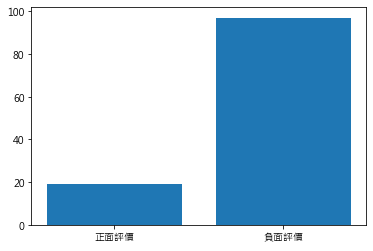

In [9]:
list_x=['正面評價','負面評價']
list_y=[pos,native]
plt.bar(list_x,list_y)

* 19:97，看來這次的新車還沒正式引進台灣，就先引來罵聲了。
* 排除一些台灣山葉沒辦法控制的東西(ex:引擎、沒有TCS、外觀)，似乎能決定消費者買單的就是價格了。

<h2>結論
    <h4>原則上大多數的網友，對於有可能即將進口販售的車款，大多抱持著負面的看法。大多較不能諒解的，就是該車款於原有車款(MT07)性質過於相近，損失R7當年的經典設計與配置，以至於大多數人寧願選擇其他車款。再來就是價格問題，由於該車款台灣總公司尚未宣布進口代理，因此售價為大眾討論的議題之一。但由於台灣關稅過高，所以大多數人對於該車款的訂價似乎不太樂觀。再來就是這台車的外觀設計，也成了目前該車最受討論的地方，但一樣似乎負評較多。